In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


#### 二元一次函数

In [12]:
def mesh_square(x1_0, x2_0, r, num):
    '''给定坐标中心生成网格坐标'''
    
    # generate mesh
    rr = np.linspace(-r, r, num)
    xx1, xx2 = np.meshgrid(rr, rr);

    xx1 = xx1 + x1_0;
    xx2 = xx2 + x2_0;

    return xx1, xx2


def plot_surf(xx1, xx2, ff, caption):
    
    # 创建标准化对象，将函数值 ff 映射到 0~1 
    norm_plt = plt.Normalize(ff.min(), ff.max())
    # 将标准化后的函数值 ff 映射到具体的颜色
    colors = cm.coolwarm(norm_plt(ff))

    fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
    
    surf = ax.plot_surface(xx1, xx2, ff, facecolors=colors, shade=False)
    # 将表面颜色设置成透明
    surf.set_facecolor((0, 0, 0, 0))
    # z_lim = [ff.min(),ff.max()]
    # ax.plot3D([0,0],[0,0],z_lim,'k')
    plt.show()

    plt.tight_layout()
    ax.set_xlabel('$\it{x_1}$')
    ax.set_ylabel('$\it{x_2}$')
    ax.set_zlabel('$\it{f}$($\it{x_1}$,$\it{x_2}$)')
    # 设置标题
    ax.set_title(caption)

    ax.xaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle": ":"})
    ax.yaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle": ":"})
    ax.zaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle": ":"})

    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams["font.size"] = "10"


def plot_contourf(xx1, xx2, ff, caption):
    fig, ax = plt.subplots()

    cntr2 = ax.contourf(xx1, xx2, ff, levels=15, cmap="RdBu_r")

    fig.colorbar(cntr2, ax=ax)
    plt.show()

    ax.set_xlabel('$\it{x_1}$')
    ax.set_ylabel('$\it{x_2}$')

    ax.set_title(caption)
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])


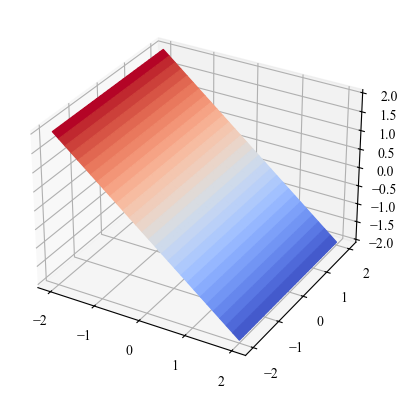

<Figure size 640x480 with 0 Axes>

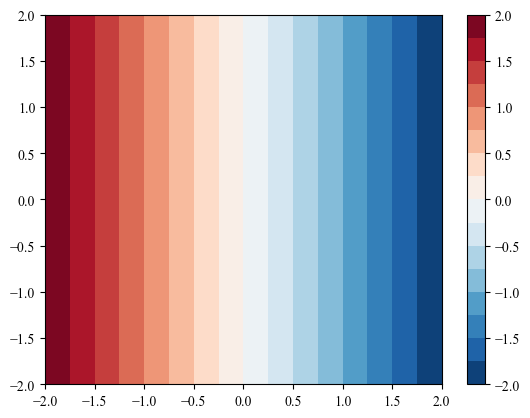

In [11]:
x1_0 = 0;  # center of the mesh
x2_0 = 0;  # center of the mesh
r = 2;  # radius of the mesh
num = 30;  # number of mesh grids
xx1, xx2 = mesh_square(x1_0, x2_0, r, num);  # generate mesh

plt.close('all')

# f(x1,x2) = -x1

ff = -xx1;
caption = '$\it{f} = -\it{x_1}$';
plot_surf(xx1, xx2, ff, caption)
plot_contourf(xx1, xx2, ff, caption)

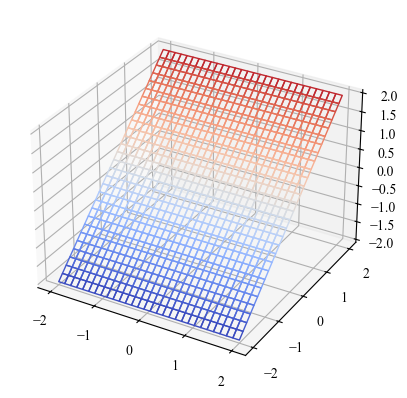

<Figure size 640x480 with 0 Axes>

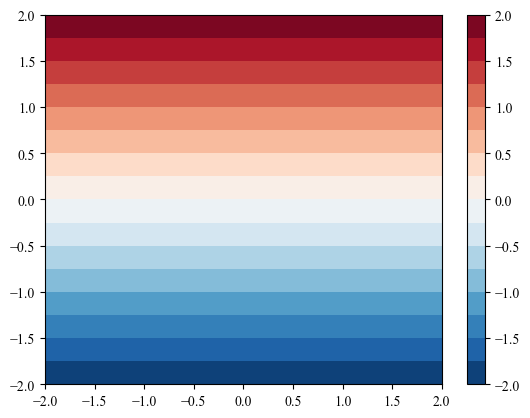

In [7]:
ff = xx2;
caption = '$\it{f} = \it{x_2}$';
plot_surf(xx1, xx2, ff, caption)
plot_contourf(xx1, xx2, ff, caption)


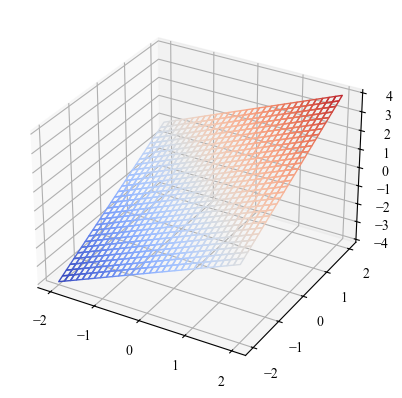

<Figure size 640x480 with 0 Axes>

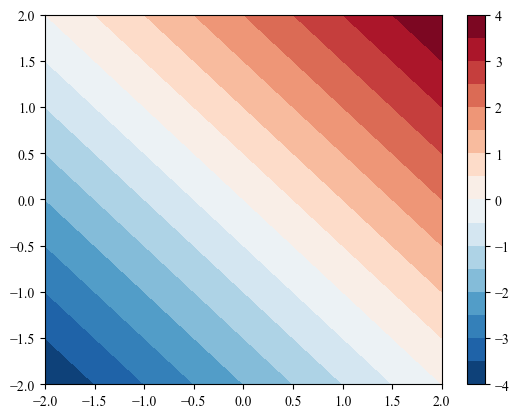

In [8]:
ff = xx1 + xx2;
caption = '$\it{f} = \it{x_1} + \it{x_2}$';
plot_surf(xx1, xx2, ff, caption)
plot_contourf(xx1, xx2, ff, caption)


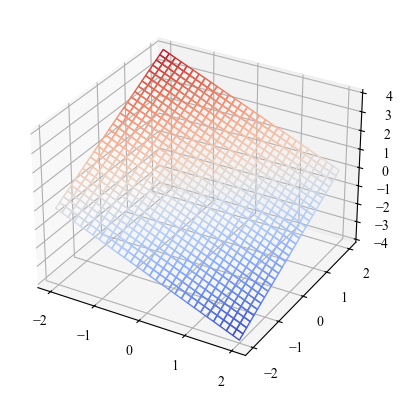

<Figure size 640x480 with 0 Axes>

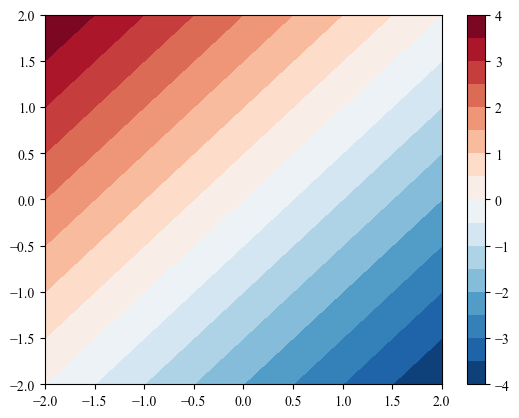

In [9]:
ff = -xx1 + xx2;
caption = '$\it{f} = -\it{x_1} + \it{x_2}$';
plot_surf(xx1, xx2, ff, caption)
plot_contourf(xx1, xx2, ff, caption)

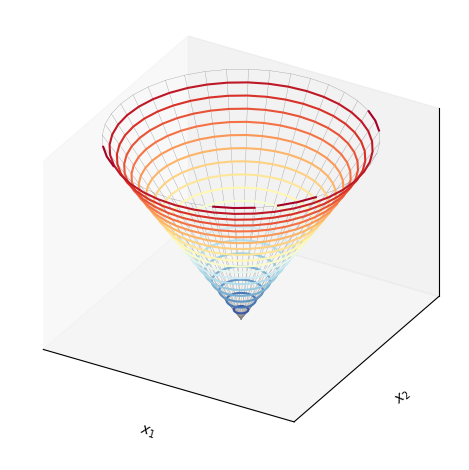

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def mesh_circ(c1, c2, r, num):
    
    theta = np.arange(0,2*np.pi+np.pi/num,np.pi/num)
    r     = np.arange(0,r,r/num)
    theta,r = np.meshgrid(theta,r)
    xx1 = np.cos(theta)*r + c1
    xx2 = np.sin(theta)*r + c2
    
    return xx1, xx2

xx1, xx2 = mesh_circ(0, 0, 4, 20)

ff_x = np.sqrt(xx1**2 + xx2**2)

# 3D visualization
ax = plt.figure().add_subplot(projection='3d')
ax.plot_wireframe(xx1, xx2, ff_x, rstride=1, 
                  cstride=1, color = [0.5,0.5,0.5],
                  linewidth = 0.2)

ax.contour3D(xx1, xx2, ff_x, 20, cmap = 'RdYlBu_r')

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.zaxis.set_ticks([])
plt.xlim(xx1.min(),xx1.max())
plt.ylim(xx2.min(),xx2.max())
ax.set_proj_type('ortho')
# ax.view_init(30, -125)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1,x_2)$')
plt.tight_layout()